In [1]:
%matplotlib inline
%config IPCompleter.greedy=True
from lesanalysis import *

## Set test and reference cases

In [2]:
palmcase = '/Users/qingli/data/palm/debug/RUN_ifort.grizzly_hdf5_fftw_serial_mpirun_test_convection_master'
palmcase_ref = '/Users/qingli/data/palm/debug/RUN_ifort.grizzly_hdf5_fftw_parallel_mpirun_test_convection_master'

In [3]:
inputfile_vol     = palmcase+'/DATA_3D_NETCDF'
inputfile_vol_ref = palmcase_ref+'/DATA_3D_NETCDF'
data_vol          = PALMData3D(inputfile_vol)
data_vol_ref      = PALMData3D(inputfile_vol_ref)

## Parameters

In [4]:
# flags
f_ref = True

# boundary layer depth
hb = 18

## Functions

In [5]:
def plot_xy(var, zidx, hb, data_vol, f_ref=False, data_vol_ref=None, **kwargs):
    print('z = {:6.2f} m, z/h_b = {:6.2f}'.format(zw[zidx], zw[zidx]/hb))
    if f_ref:
        fig, axarr = plt.subplots(1, 2)
        fig.set_size_inches(12, 6)
        data_vol.read_slice_xy(var, zidx=zidx, tidx=-1).plot(axis=axarr[0], title='test', **kwargs)
        data_vol_ref.read_slice_xy(var, zidx=zidx, tidx=-1).plot(axis=axarr[1], title='ref', **kwargs)
    else:
        fig = plt.figure(figsize=[6,6])
        data_vol.read_slice_xy(var, zidx=zidx, tidx=-1).plot(**kwargs)

In [6]:
def plot_xz(var, zidx, hb, data_vol, f_ref=False, data_vol_ref=None, **kwargs):
    if f_ref:
        fig, axarr = plt.subplots(1, 2)
        fig.set_size_inches(12, 4)
        data_vol.read_slice_xz(var, yidx=0, tidx=-1).plot(axis=axarr[0], title='test', **kwargs)
        data_vol_ref.read_slice_xz(var, yidx=0, tidx=-1).plot(axis=axarr[1], title='ref', **kwargs)
    else:
        fig = plt.figure(figsize=[6,4])
        data_vol.read_slice_xz(var, yidx=0, tidx=-1).plot(**kwargs)

## Plot slice

### xy-slice

In [7]:
depth1 = -0.1*hb
depth2 = -0.2*hb
depth3 = -0.5*hb
depth4 = -0.9*hb
zw = data_vol.dataset.variables['zw_3d'][:]
zidx1 = np.argmin(np.abs(zw-depth1))
zidx2 = np.argmin(np.abs(zw-depth2))
zidx3 = np.argmin(np.abs(zw-depth3))
zidx4 = np.argmin(np.abs(zw-depth4))

z =  -2.00 m, z/h_b =  -0.11


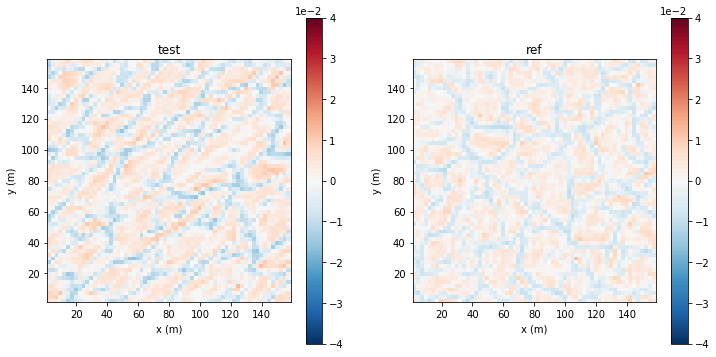

In [8]:
plot_xy('w', zidx1, hb, data_vol, f_ref, data_vol_ref, clim=[-4e-2, 4e-2], ptype='pcolor', cmap='RdBu_r')

z =  -4.00 m, z/h_b =  -0.22


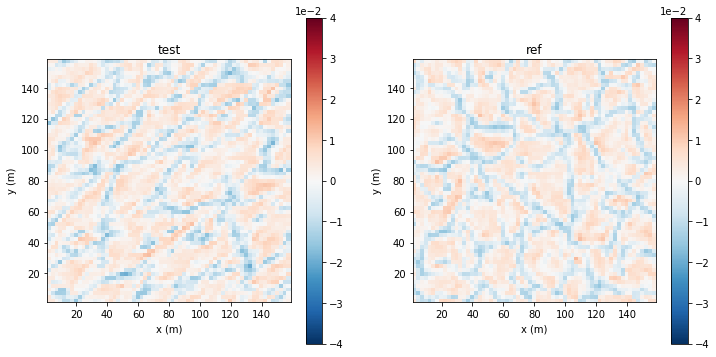

In [9]:
plot_xy('w', zidx2, hb, data_vol, f_ref, data_vol_ref, clim=[-4e-2, 4e-2], ptype='pcolor', cmap='RdBu_r')

z =  -9.00 m, z/h_b =  -0.50


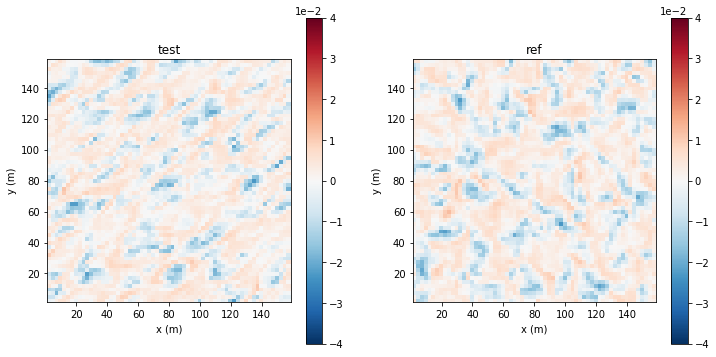

In [10]:
plot_xy('w', zidx3, hb, data_vol, f_ref, data_vol_ref, clim=[-4e-2, 4e-2], ptype='pcolor', cmap='RdBu_r')

z = -16.00 m, z/h_b =  -0.89


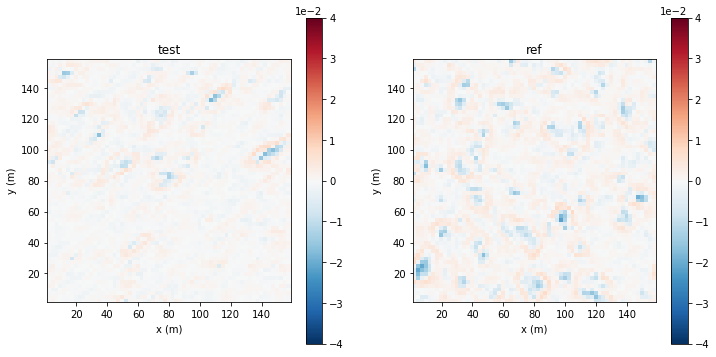

In [11]:
plot_xy('w', zidx4, hb, data_vol, f_ref, data_vol_ref, clim=[-4e-2, 4e-2], ptype='pcolor', cmap='RdBu_r')

### xz-slice

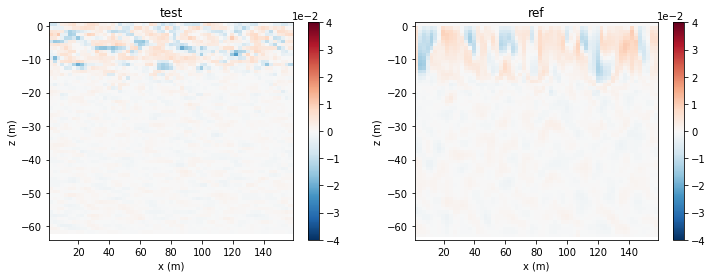

In [12]:
plot_xz('w', zidx4, hb, data_vol, f_ref, data_vol_ref, clim=[-4e-2, 4e-2], ptype='pcolor', cmap='RdBu_r')